# Notebook for testing of GaussEP on RBM 

In [3]:
using Pkg
using Plots
using Revise
using DelimitedFiles

In [4]:
#include("../src/GaussianEP.jl")
Pkg.activate("/Users/luca/repos/GaussianEP/")
using GaussianEP

┌ Info: Precompiling GaussianEP [61ebe778-2184-11e9-3f76-6b275578b029]
└ @ Base loading.jl:1317


In [61]:
include("/Users/luca/CODE/mom_comp.jl")

average_h2 (generic function with 1 method)

In [6]:
N = 3
M = 2
w = randn(N,M)
y = zeros(N+M)
H = [GaussianEP.TermRBM(w,y,1.0)]
#μv = 3.0
#βv = 5.0
#μh = 5.0
#βh = 4.0
#P0 = [[GaussianEP.GaussianPrior(μv, βv, 0.0) for i = 1:N]; [GaussianEP.GaussianPrior(μh, βh, 0.0) for i = 1:M]]



1-element Vector{TermRBM{Float64}}:
 TermRBM{Float64}([-0.7314004544915215 1.2711254674935935; 1.372632278262612 -1.2440210389731439; 1.4108620795473927 -1.311331072011278], [0.0, 0.0, 0.0, 0.0, 0.0], 1.0)

In [7]:
Pv = [GaussianEP.BinaryPrior(0.0, 1.0, 0.9) for i = 1:N]
Ph = [GaussianEP.GaussianPrior(0.5,1.5,0.0) for j = 1:M ]
#Pv = [GaussianEP.BinaryPrior(0.0, 1.0, 0.9) for i = 1:N]
#Ph = [GaussianEP.BinaryPrior(0.0, 1.0, 0.5) for i = 1:M]
P0 = vcat(Pv,Ph)

5-element Vector{Prior}:
 BinaryPrior{Float64}(0.0, 1.0, 0.9)
 BinaryPrior{Float64}(0.0, 1.0, 0.9)
 BinaryPrior{Float64}(0.0, 1.0, 0.9)
 GaussianPrior{Float64}(0.5, 1.5, 0.0)
 GaussianPrior{Float64}(0.5, 1.5, 0.0)

In [87]:
γ_start = 2.5
step = 0.1
γ = γ_start
N_iter = 4
for i=1:N_iter
    Ph = [GaussianEP.ReLUPrior(γ,0.0) for j = 1:M ]
    P0 = vcat(Pv,Ph)
    if i==1
        out = GaussianEP.expectation_propagation(H, P0)
    else
        out = GaussianEP.expectation_propagation(H, P0; state = init_state)
    end
    γ -= step
    init_state = out.state
end

In [90]:
#out = GaussianEP.expectation_propagation(H, P0; state = init_state)

EPOut{Float64}([4.863316477644535, 4.981492285084439, 2.753785920954331, 4.017204896934752, 2.516834660025979, 0.12472870758172938, 6.98956183209775, 0.18551399381659017], [0.2538188202094788, 0.26847970852559033, 0.2025558343651041, 0.21730944310798067, 0.20915180895515179, 0.015212893943247425, 0.7672378531020595, 0.032614963391782464], [-3.9244047728729594, -2.7870932214729587, 22.266825926385003, -8.753178777493547, 13.558903542278053, 4.77546377996211, -10.160379896375805, 3.802998750846753], [-0.9432344269961348, -0.7841146357253014, -15.850466456722256, -2.510877348882336, -4.570720607916862, -0.6058820531750159, -1.1152956716969857, -0.7489199835160929], :converged, EPState{Float64}([0.0 0.0 … -1.311043464533235 -0.6561646023587571; 0.0 0.0 … -1.4395186116414012 -0.5627715563930883; … ; -1.311043464533235 -1.4395186116414012 … 0.0 0.0; -0.6561646023587571 -0.5627715563930883 … 0.0 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.25381882020947893 0.05919187878948526 … 0.20207

true


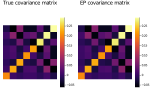

In [8]:
using LinearAlgebra, Plots
W = zeros(N+M, N+M)
W[1:N,N+1:N+M] .= w
W[N+1:N+M,1:N] .= w'
W[1:N, 1:N] .= βv .* I(N)
W[N+1:N+M,N+1:N+M] .= βh .* I(M)

W1 = inv(W)
println(isposdef(W))
p1 = heatmap(W1, aspect_ratio=1, ticks= :false, showaxis = :false, title="True covariance matrix", titlelocation=:center)
p2 = heatmap(out.state.Σ, aspect_ratio=1, ticks= :false, showaxis =:false, title="EP covariance matrix", titlelocation=:center)
Plots.plot(p1,p2)

In [9]:
diag(W1)

8-element Vector{Float64}:
 0.20147279029290605
 0.2271222183654982
 0.22771130318005206
 0.20916791423692147
 0.21979500696936477
 0.27529627291687514
 0.2875198559876098
 0.2937704124014432

In [19]:
eigen(W).values

8-element Vector{Float64}:
 1.7918890317627636
 2.3579286943093525
 3.2847043390929755
 5.0
 5.0000000000000036
 5.715295660907022
 6.642071305690646
 7.208110968237236

In [8]:
out = GaussianEP.expectation_propagation(H, P0; epsconv=1.0e-10)

EPOut{Float64}([0.06691250157596769, 0.49589227459599483, 0.5090145155158953, -0.39992479125262087, 1.29955519261337], [0.062435218708813814, 0.24998312659200528, 0.24991873851001367, 1.3868670269239514, 1.3554347998134428], [0.6258826891784448, -0.0905286509948986, -0.07357292718255991, 1.3330318810459274, -0.27389874679639115], [-0.2874765281731282, -0.27078616270420724, -0.25682907907716584, -1.2837788884457155, -1.3119410675218721], :converged, EPState{Float64}([0.0 0.0 … -0.7314004544915215 1.2711254674935935; 0.0 0.0 … 1.372632278262612 -1.2440210389731439; … ; -0.7314004544915215 1.372632278262612 … 0.0 0.0; 1.2711254674935935 -1.2440210389731439 … 0.0 0.0], [0.0, 0.0, 0.0, 0.0, 0.0], [0.062435218771221754 -0.03596907302208068 … 0.09768980471086125 -0.11464906149846565; -0.03596907302208068 0.24998312629073655 … -0.36068118981657726 0.34412019691726237; … ; 0.09768980471086125 -0.36068118981657726 … 1.3868670267290162 -0.7002627678068228; -0.11464906149846565 0.34412019691726237

In [9]:
out.av

5-element Vector{Float64}:
  0.06691250157596769
  0.49589227459599483
  0.5090145155158953
 -0.39992479125262087
  1.29955519261337

In [10]:
h, J = CoupField(w,Pv,Ph)

([-1.6602307220231731, -1.0961924181872993, -0.9936945838725773], [0.0 -1.7235004646050736 -1.7991809921033513; -1.7235004646050736 0.0 2.378612182136467; -1.7991809921033513 2.378612182136467 0.0])

In [11]:
av_v = zeros(N)
for i=1:N
    av_v[i] = average_v(h,J,i)
end

In [13]:
av_v

3-element Vector{Float64}:
 0.06766457248804005
 0.5177544802838886
 0.5289132597229956

In [14]:
av_h = zeros(M)
for j=1:M
    av_h[j] = average_h(h,J,Ph[j],w,j)
end

In [15]:
av_h

2-element Vector{Float64}:
 -0.6049468495299982
  1.1677784646884566

In [18]:
Δ_vec = collect(0.07:0.1:1.5)
acc_tab = GaussianEP.MC_Δ_scan(Δ_vec,w,P0,10^5)

15×2 Matrix{Float64}:
 0.07  0.555046
 0.17  0.532166
 0.27  0.523272
 0.37  0.508462
 0.47  0.502386
 0.57  0.495758
 0.67  0.486964
 0.77  0.47351
 0.87  0.463426
 0.97  0.456698
 1.07  0.44687
 1.17  0.438336
 1.27  0.429774
 1.37  0.42229
 1.47  0.414252

In [43]:
Δ = 0.47;
GaussianEP.MC_sim(w,P0,5*10^6,Δ; N_iter=5*10^5)

In [44]:
data = readdlm("/Users/luca/Desktop/MC/MC_path.txt";comments=true)

500000×19 Matrix{Float64}:
      1.0  0.6  0.0  0.0  0.0   1.05582   …   0.0       -0.0      2.3533
      2.0  0.2  0.0  0.0  0.0   0.881062      0.0       -0.0      2.2305
      3.0  0.6  0.0  0.0  0.0   1.30342       0.0       -0.0      2.03131
      4.0  0.4  0.0  0.0  0.0   1.46648       0.0       -0.0      1.73896
      5.0  0.8  1.0  0.0  0.0   1.46648       0.0       -0.0      2.2502
      6.0  0.2  1.0  0.0  0.0   1.34713   …   0.0       -0.0      2.17516
      7.0  0.6  0.0  0.0  0.0   1.0626        0.0       -0.0      1.94464
      8.0  0.8  0.0  0.0  0.0   1.12828       0.0       -0.0      2.66965
      9.0  0.4  0.0  0.0  0.0   1.12828       0.0       -0.0      2.66965
     10.0  0.6  1.0  0.0  0.0   1.47738       0.0       -0.0      3.05951
     11.0  0.6  0.0  0.0  0.0   2.12156   …   0.0       -0.0      5.19994
     12.0  0.4  0.0  0.0  0.0   2.25165       0.0       -0.0      6.61028
     13.0  0.2  0.0  0.0  0.0   2.26131       0.0       -0.0      6.63573
      ⋮       

In [72]:
v1 = data[:,3]
av_v1, s_v1, tau_v1 = GaussianEP.Autocorrelation(v1,"v1")

(0.064158, 0.001133077675536974, 5.345539696641432)

In [75]:
v2 = data[:,4]
av_v2, s_v2, tau_v2 = GaussianEP.Autocorrelation(v2,"v2")

(0.511714, 0.006210131058948438, 38.5865981480124)

In [45]:
h1 = data[:,6]
av_h1, s_h1, tau_h1 = GaussianEP.Autocorrelation(h1,"h1")

(-0.42533842722636644, 0.018101730511935497, 58.549678817226855)

In [39]:
out.av[4]

-0.39992479125262087

In [46]:
h2 = data[:,7]
av_h2, s_h2, tau_h2 = GaussianEP.Autocorrelation(h2,"h2")

(1.317988070619405, 0.017897745927247775, 60.04458193997693)

In [25]:
out.av[5]

1.29955519261337

In [27]:
v1h1 = data[:,13]
av_v1h1, s_v1h1, tau_v1h1 = GaussianEP.Autocorrelation(v1h1,"v1h1")

(0.05313343806734542, 0.0017543404757428, 8.128416895862928)

In [49]:
v1h2 = data[:,14]
av_v1h2, s_v1h2, tau_v1h2 = GaussianEP.Autocorrelation(v1h2,"v1h2")

(-0.014648741837699562, 0.001328137887716164, 7.9731388016581475)

In [48]:
m_v1h1 = CrossCorrel(w,Pv,Ph,1,1)
m_v1h2 = CrossCorrel(w,Pv,Ph,1,2)

-0.044705920105309715

In [47]:
out.state.Σ[1,5]+out.av[1]*out.av[5]

-0.02769257262466654

In [50]:
abs(av_v1h2-m_v1h2)

0.030057178267610153

In [52]:
abs(out.state.Σ[1,5]+out.av[1]*out.av[5]-m_v1h2)

0.017013347480643176

In [58]:
h12 = data[:,11]
av_h12, s_h12, tau_h12 = GaussianEP.Autocorrelation(h12,"h12")

(1.5800330877635749, 0.019390546772428414, 24.256368779882738)

In [64]:
out.va.+(out.av).^2

5-element Vector{Float64}:
 0.06691250157596769
 0.49589227459599483
 0.5090145155158953
 1.5468068655824037
 3.044278498461816

In [62]:
m_h12 = average_h2(h,J,Ph[1],w,1)

1.768113529841758

In [80]:
m_h22 = average_h2(h,J,Ph[2],w,2)
m_h11 = average_h2(h,J,Ph[1],w,1)

1.768113529841758

In [81]:
s_h2 = m_h22-av_h[2]^2
s_h1 = m_h11-av_h[1]^2

1.4021528390854878

In [66]:
v12 = data[:,8]
av_v12, s_v12, tau_v12 = GaussianEP.Autocorrelation(v12,"v12")

(0.064158, 0.001133077675536974, 5.345539696641432)

In [76]:
v22 = data[:,9]
av_v22, s_v22, tau_v22 = GaussianEP.Autocorrelation(v22,"v22")

(0.511714, 0.006210131058948438, 38.5865981480124)

In [77]:
av_v12-av_v1^2
av_v22-av_v2^2

0.249862782204

In [74]:
out.va

5-element Vector{Float64}:
 0.062435218708813814
 0.24998312659200528
 0.24991873851001367
 1.3868670269239514
 1.3554347998134428

In [82]:
s_h1

1.4021528390854878

In [83]:
s_h2

1.3595850010694184